In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
past = 'DataSet/Final/DataSet2017_2021.csv'
df = pd.read_csv(past, delimiter = ';',  low_memory=False, encoding='UTF-8', index_col = False)
df.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop', 'ano', 'mes', 'dia', 'mortes'],
      dtype='object')

In [3]:
df1 = df.copy()
#df1 = df1[(df1['ano'] == 2019) | (df1['ano'] == 2020) | (df1['ano'] == 2021)]

In [4]:
#df2 = df[['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via','uso_solo', 'latitude', 'longitude']]
df1['uf_br'] = df1['uf'] + ' ' + df1['br'].map(str)
col1 = ['uf', 'uf_br', 'mes','causa_acidente', 'tipo_pista', 'tracado_via', 'mortos', 'condicao_metereologica'] # colunas selecionadas
col2 = ['uf', 'uf_br', 'mes', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'causa_acidente'] # colunas categorizada
col3 = ['uf_br', 'tipo_pista', 'mes', 'tracado_via', 'condicao_metereologica', 'causa_acidente', 'mortos'] #atributos de estudo

ci = 2
cf = 20

df2 = df1.copy()
df2 = df2[col1]
df2 = df2.reset_index(drop=True)
df3 = df2.copy()
df3

,uf,uf_br,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
0,PR,PR 376,January,Fenomenos Da Natureza,Simples,Reta,0,Chuva
1,SC,SC 101,January,Falta De Atencao A Conducao,Dupla,Curva,0,Chuva
2,PR,PR 153,January,Animais Na Pista,Simples,Reta,0,Garoa/Chuvisco
3,GO,GO 153,January,Avarias E/Ou Desgaste Excessivo No Pneu,Dupla,Reta,0,Ceu Claro
4,SC,SC 280,January,Ingestao De Alcool,Simples,Nao Informado,0,Chuva
...,...,...,...,...,...,...,...,...
303768,ES,ES 101,November,Velocidade Incompativel,Simples,Curva,0,Ceu Claro
303769,ES,ES 101,May,Condutor Deixou De Manter Distancia Do Veiculo...,Simples,Reta,0,Ceu Claro
303770,SC,SC 101,May,Velocidade Incompativel,Multipla,Nao Informado,1,Nublado
303771,MG,MG 50,March,Reacao Tardia Ou Ineficiente Do Condutor,Dupla,Reta,0,Ceu Claro


In [5]:
df4 = df3.copy()
df4 = df4[df4.uf == 'MG']
df4

,uf,uf_br,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
29,MG,MG 381,January,Condutor Dormindo,Dupla,Reta,0,Ceu Claro
32,MG,MG 262,January,Velocidade Incompativel,Simples,Viaduto,0,Ceu Claro
33,MG,MG 459,January,Falta De Atencao A Conducao,Simples,Curva,0,Ceu Claro
38,MG,MG 262,January,Condutor Dormindo,Simples,Curva,0,Ceu Claro
39,MG,MG 135,January,Animais Na Pista,Simples,Reta,0,Ceu Claro
...,...,...,...,...,...,...,...,...
303741,MG,MG 381,March,Velocidade Incompativel,Simples,Curva,0,Nublado
303747,MG,MG 365,August,Ausencia De Reacao Do Condutor,Simples,Curva,0,Ceu Claro
303749,MG,MG 50,April,Obras Na Pista,Dupla,Nao Informado,0,Ceu Claro
303767,MG,MG 262,August,Desrespeitar A Preferencia No Cruzamento,Simples,Reta,0,Ceu Claro


In [26]:
col4 = ['mes', 'causa_acidente', 'tipo_pista',
       'tracado_via', 'mortos', 'condicao_metereologica']
l = []
for i in col4: 
    df5 = df4[['uf_br', i]].copy()
    df5 = df5.groupby(['uf_br', i]).size()
    df5 = df5.unstack(level=1)
    df5 = df5.reset_index()
    
    l.append(df5)

df6 = pd.concat(l, ignore_index=True)
df6 = df6.fillna(0)
df6

,uf_br,April,August,December,February,January,July,June,March,May,...,13,Ceu Claro,Garoa/Chuvisco,Granizo,Ignorado,Neve,Nevoeiro/Neblina,Nublado,Sol,Vento
0,MG 116,459.0,456.0,479.0,417.0,543.0,456.0,435.0,422.0,471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MG 120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MG 122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MG 135,25.0,8.0,9.0,29.0,27.0,5.0,20.0,25.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MG 146,29.0,26.0,32.0,33.0,38.0,30.0,27.0,30.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,MG 40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4707.0,200.0,0.0,110.0,0.0,77.0,1366.0,367.0,1.0
122,MG 451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
123,MG 452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
124,MG 459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,280.0,10.0,0.0,21.0,0.0,3.0,98.0,25.0,0.0


In [19]:
col4.remove('uf_br')

ValueError: list.remove(x): x not in list

In [122]:
le = preprocessing.LabelEncoder()
for i in col2:
    df3[i] = le.fit_transform(df3[i])
df3

,uf,uf_br,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
0,17,172,4,42,2,5,0,1
1,23,223,4,38,0,0,0,1
2,17,164,4,8,2,5,0,2
3,8,59,4,12,0,5,0,0
4,23,228,4,46,2,3,0,1
...,...,...,...,...,...,...,...,...
303768,7,51,9,84,2,0,0,0
303769,7,51,8,15,2,5,0,0
303770,23,223,8,84,1,3,1,7
303771,10,100,7,69,0,5,0,0


In [123]:
col1

['uf',
 'uf_br',
 'mes',
 'causa_acidente',
 'tipo_pista',
 'tracado_via',
 'mortos',
 'condicao_metereologica']

In [124]:
#df3[col2] = stats.zscore(df3[col2])
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df3.columns)
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df1.columns)*
#kk = col1
#df3[kk] = (df3[kk] - df3[kk].min()) / ( df3[kk].max() - df3[kk].min())
#df3

In [125]:
cluster = range(ci,cf)

metodo = ['k-means++', 'random']
CHS = []

for j in metodo:
    for i in cluster:
    
        model = KMeans(n_clusters = i, init=j, max_iter = 1000)
        model.fit(df3)
        CHS.append([j,metrics.calinski_harabasz_score(df3, model.labels_), i])
print('terminou')

terminou


In [126]:
CHS2 = pd.DataFrame(CHS, columns = ['meth', 'chs', 'cluster'])

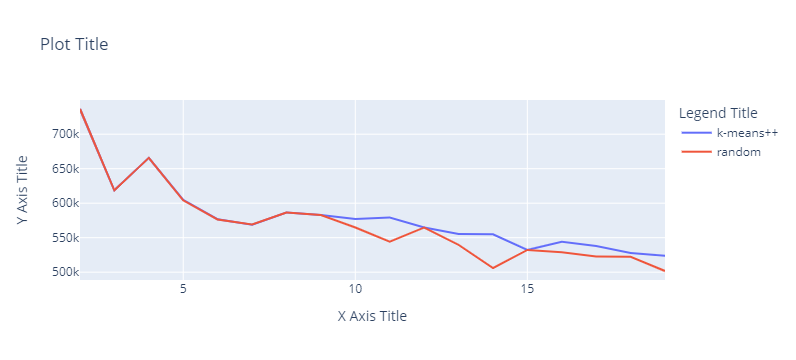

In [127]:
fig = px.line(CHS2, x = 'cluster', y = 'chs', color = 'meth', title="Unsorted Input")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Plot Title",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
)
fig.show()

In [128]:
m = CHS2['chs'].max()
met = CHS2[CHS2['chs'] == m].meth.values[0]
n = CHS2[CHS2['chs'] == m].cluster.values[0]
model = KMeans(n_clusters = n, init=met, max_iter = 1000)
model.fit(df3)
dfresult = df1.copy()
dfresult = dfresult[col1]
dfresult['cluster'] = model.labels_
dfresult

print(met, str(n))

k-means++ 2


In [129]:
dcenter = dfresult.groupby(['cluster']).size().reset_index(name='Frequency')
dcenter
for i,a in enumerate(col1):
    dcenter[a] = model.cluster_centers_[:,i]
dcenter

,cluster,Frequency,uf,uf_br,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
0,0,131227,8.700877,75.440908,5.465362,43.072508,1.191874,3.696008,0.092001,1.976758
1,1,172546,20.184809,197.435553,5.448066,42.700451,1.038888,3.807356,0.064412,2.326562


In [130]:
dre = []
for j in range(0,n):
    print('Cluster ' + str(j))
    dd = dfresult[dfresult['cluster'] == j]
    for i in col3:
        d = dd[[i]].copy()
        dfselect = d.groupby([i]).size().reset_index(name='Frequency')
        dfselect = dfselect.sort_values(by=['Frequency'], ascending=False)
        dfselect['Frequencia %'] = (dfselect['Frequency']/dfselect['Frequency'].sum())*100
        dre.append(dfselect)
        print(dfselect)

Cluster 0
      uf_br  Frequency  Frequencia %
95   MG 381      13175     10.039855
51   ES 101       8669      6.606110
96    MG 40       8269      6.301295
80   MG 116       5383      4.102052
87   MG 262       4653      3.545764
..      ...        ...           ...
64   GO 352          1      0.000762
81   MG 120          1      0.000762
134  PB 408          1      0.000762
82   MG 122          1      0.000762
90   MG 352          1      0.000762

[137 rows x 3 columns]
  tipo_pista  Frequency  Frequencia %
2    Simples      75074     57.209263
0      Dupla      49895     38.021901
1   Multipla       6258      4.768836
          mes  Frequency  Frequencia %
4     January      12262      9.344114
7       March      11589      8.831262
2    December      11552      8.803066
3    February      11206      8.539401
8         May      11163      8.506634
10    October      10859      8.274974
0       April      10788      8.220869
11  September      10558      8.045600
1      August      

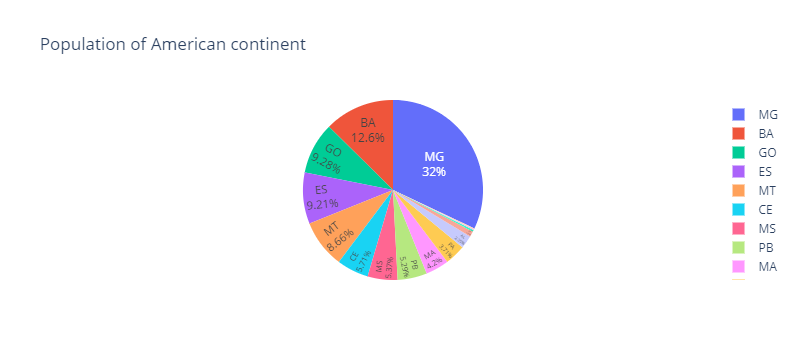

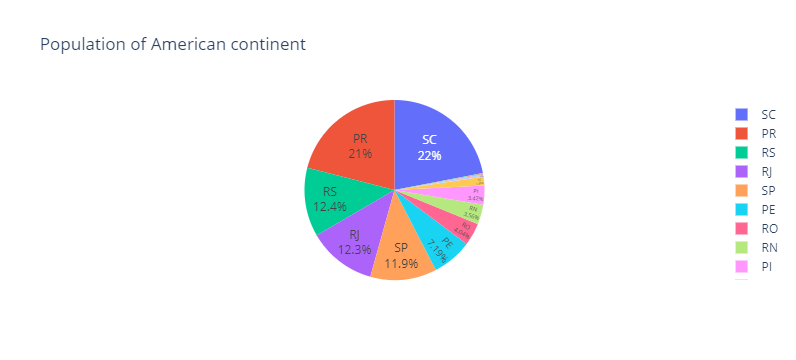

In [131]:
dfuf = dfresult.groupby(['cluster', 'uf']).size().reset_index(name='Frequency')
for i in range(0,n):
    fig = px.pie(dfuf[dfuf['cluster']==i], names ='uf', values = 'Frequency', title='Population of American continent')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    #fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()